In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("homeprices.csv")
df.head()


,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


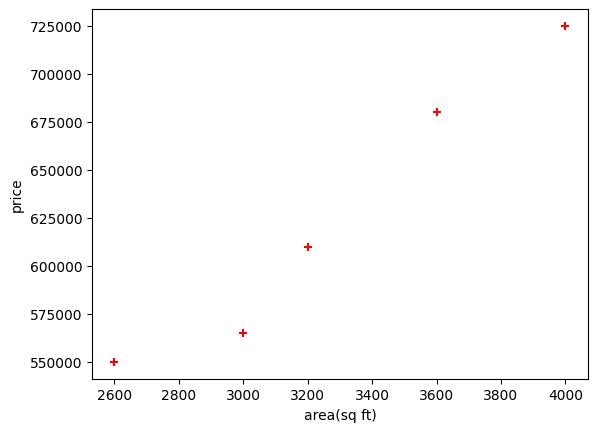

In [3]:
%matplotlib inline 
plt.xlabel('area(sq ft)')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [4]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [5]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [6]:
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


PREDICT PRICE

In [8]:
reg.predict([[3300]])

c:\Users\Yash\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [9]:
reg.coef_

array([135.78767123])

In [10]:
reg.intercept_

np.float64(180616.43835616432)

In [11]:
reg.predict([[5000]])

c:\Users\Yash\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

EXERCISE

In [14]:
df = pd.read_csv('canada_per_capita_income.csv')
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [16]:
new_df = df.drop('per capita income (US$)',axis='columns')

In [17]:
price = df['per capita income (US$)']

In [18]:
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
reg.predict([[2020]])

c:\Users\Yash\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

ONE OR MORE VARIABLE TO MAKE PREDICTION

In [20]:
df = pd.read_csv("homeprice2.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [21]:
df.bedrooms.fillna(df.bedrooms.median(),inplace=True)
df

C:\Users\Yash\AppData\Local\Temp\ipykernel_1464\1839005977.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.bedrooms.fillna(df.bedrooms.median(),inplace=True)


,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [22]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
(reg.coef_,reg.intercept_)

(array([  112.06244194, 23388.88007794, -3231.71790863]),
 np.float64(221323.0018654043))

In [24]:
reg.predict([[3000, 3, 40]])

c:\Users\Yash\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [25]:
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

498408.25157402386

EXERCISE

In [45]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [46]:
df.rename(columns={
    "test_score(out of 10)": "test_score",
    "interview_score(out of 10)": "interview_score"
}, inplace=True)


df


,experience,test_score,interview_score,salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [47]:
from word2number import w2n

In [48]:
df.experience = df.experience.fillna("zero")
df

,experience,test_score,interview_score,salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [49]:
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score,interview_score,salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [50]:
import math
median_test_score = math.floor(df['test_score'].mean())
median_test_score

7

In [51]:
df['test_score'] = df['test_score'].fillna(median_test_score)
df

,experience,test_score,interview_score,salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [52]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score','interview_score']],df['salary($)'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
reg.predict([[2,9,6]])

c:\Users\Yash\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [54]:
reg.predict([[12,10,10]])

c:\Users\Yash\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])